# Libraries

In [3]:
## import torch
import torchvision
import torch
import torchvision.datasets as datasets
import torch.nn as nn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from torch.nn import functional as F
import time
import pandas as pd 
from random import shuffle

# Classes

## Data Loaders

In [4]:
## CUSTOM DATA LOADER
from torch.utils.data.dataset import Dataset
class rgenData(Dataset):
    def __init__(self, randEnc, x, transform=None):
        self.randEnc= randEnc
        self.x=x 
    def __len__(self):
        z=self.x.shape[0]
        return  z
    def __getitem__(self, idx):
        randEnc=self.randEnc[idx]
        x=self.x[idx]
        return randEnc, x

## CUSTOM DATA LOADER
from torch.utils.data.dataset import Dataset
class mnistData(Dataset):
    def __init__(self, label, x, transform=None):
        self.label= label
        self.x=x 
    def __len__(self):
        z=self.x.shape[0]
        return  z
    def __getitem__(self, idx):
        label=self.label[idx]
        x=self.x[idx]
        return x

## Omega=2

### Square Matrix Decoder 1Layer Decoder

In [5]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate
N_TEST_IMG = 5

class Decoder_1LSQ_2D(nn.Module):
    def __init__(self):
        super(Decoder_1LSQ_2D, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.U0 = nn.Linear(2, 2)
        self.sig0 = nn.Sigmoid()
        self.U1 = nn.Linear(2, 784)
        
    def decode(self, z):
        out=self.U0(z)
        out2=self.sig0(out)
        out3=self.U1(out2)
        return out3
    
    def forward(self, x):
        encoded = x
        #decoded= x
        decoded = self.decode(encoded)
        return encoded, decoded

### Square Matrix Decoder 2Layer Decoder

### Square Matrix Decoder 3Layer Decoder

### Square Matrix Decoder 4Layer Decoder

### Square Matrix Decoder 2Layer Decoder

# Functions

In [6]:
def RMSELoss(recon_x, x):
    return torch.sqrt(torch.mean((recon_x, x))**2)
def loss_function(recon_x, x):
    BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')
    return(BCE)
def decode_loader(data, batch_size):
    perm = torch.randperm(data.size(0))
    idx = perm[:batch_size]
    batch=data[idx]
    return(batch)
def export_tensor(out_tensor,filename):
    arr = out_tensor.data.cpu().numpy()
    # write CSV
    np.savetxt(filename, arr)
def import_tensor(filename):
    from numpy import genfromtxt
    test = np.genfromtxt(filename)
    import_tensor=torch.tensor(test, dtype=torch.float)
    return(import_tensor)
def import_saved_output(filenames,loss_filename):
    imp_data=[]
    for i in range(0,len(filenames)):
        out_file='output/'+filenames[i]+'.csv'
        test=import_tensor(out_file)
        imp_data.append(test)
    test_lossvec = np.genfromtxt(loss_filename)
    return(imp_data, test_lossvec)

In [7]:
def get_images(img_return_cnt,labels_raw, data_raw):
    found=False
    img_agg_cnt=np.zeros(10)
    img_return_cnt=np.array(img_return_cnt)
    i=0
    labels=[]
    indices=[]
    while found==False and 70000>i:
        target=labels_raw[i]
        index=int(labels_raw[i].data)
        if np.dot(np.subtract(img_agg_cnt, img_return_cnt),np.ones(10))==0:
            found=True
        else:
            if img_agg_cnt[index] < img_return_cnt[index]:
                img_agg_cnt[index]+=1
                indices.append(i)
        i+=1
    return(indices)
def gen_rand_data(img_return_cnt,labels_raw, data_raw,Rdim):
    #num_img_type= scalar= equal to the number of image categories
    #img_return_cnt = array = index of array is the image type and value is sample size for image type
    #example_data = data loader data in form: batch_idx, (example_data, example_targets) 
    #max_i= data size
    #Rdim= vector dimension for rand generation
    #img_return_cnt = array = index of array is the image type and value is sample size for image type
    found=False
    img_agg_cnt=np.zeros(10)
    img_return_cnt=np.array(img_return_cnt)
    i=0
    first=True
    labels=[]
    indices=[]
    while found==False and 70000>i:
        target=labels_raw[i]
        index=int(labels_raw[i].data)
        if np.dot(np.subtract(img_agg_cnt, img_return_cnt),np.ones(10))==0:
            found=True
        else:
            if img_agg_cnt[index] < img_return_cnt[index]:
                labels.append(target.item())
                datum=data_raw[i].view(-1,28*28)
                img_agg_cnt[index]+=1
                indices.append(i)
                if first==True:
                    x_tensor=datum
                    randEnc_tensor=torch.rand(1, Rdim)
                    first=False 
                else:
                    omega=torch.rand(1, Rdim)
                    x_tensor=torch.cat((x_tensor,datum),0)
                    randEnc_tensor=torch.cat((randEnc_tensor,omega),0)
        i+=1
    data = rgenData(randEnc_tensor, x_tensor)
    return(data, labels, indices)
def get_randenc_byindex(indices, labels_raw, data_raw,Rdim):
    #num_img_type= scalar= equal to the number of image categories
    #img_return_cnt = array = index of array is the image type and value is sample size for image type
    #example_data = data loader data in form: batch_idx, (example_data, example_targets) 
    #max_i= data size
    #Rdim= vector dimension for rand generation
    #img_return_cnt = array = index of array is the image type and value is sample size for image type
    i=0
    cnt=len(indices)
    labels=[]
    datum=data_raw[indices[0]].view(-1,28*28)
    x_tensor=datum
    randEnc_tensor=torch.rand(1, Rdim)
    labels.append(labels_raw[0])
    for i in range(1,len(indices)):
        index=indices[i]
        labels.append(labels_raw[index])
        datum=data_raw[index].view(-1,28*28)
        omega=torch.rand(1, Rdim)
        x_tensor=torch.cat((x_tensor,datum),0)
        randEnc_tensor=torch.cat((randEnc_tensor,omega),0)
    data = rgenData(randEnc_tensor, x_tensor)
    return(data, labels)
def get_enc_img(indices,labels_raw, data_raw,embedding):
    #num_img_type= scalar= equal to the number of image categories
    #img_return_cnt = array = index of array is the image type and value is sample size for image type
    #example_data = data loader data in form: batch_idx, (example_data, example_targets) 
    #max_i= data size
    #Rdim= vector dimension for rand generation
    #img_return_cnt = array = index of array is the image type and value is sample size for image type
    i=0
    cnt=len(indices)
    labels=[]
    datum=data_raw[indices[0]].view(-1,28*28)
    x_tensor=datum
    randEnc_tensor=torch.tensor(embedding[0], dtype=torch.float)
    labels.append(labels_raw[0])
    for i in range(1,len(indices)):
        index=indices[i]
        labels.append(labels_raw[index])
        datum=data_raw[index].view(-1,28*28)
        omega=torch.tensor(embedding[i], dtype=torch.float)
        x_tensor=torch.cat((x_tensor,datum),0)
        randEnc_tensor=torch.cat((randEnc_tensor,omega),0)
    data = rgenData(randEnc_tensor, x_tensor)
    return(data, labels)

# Models

In [17]:
def train_AE_MSE(epoch, data, model, optimizer,size,log_interval=10):
    train_loss = 0
    optimizer.zero_grad()
    lossvec=[]
    cnt=0
    encoding=[]
    for i in range(1, epoch):
        if i%10000==0:
            print(i)
        for j in range(0,size):
            x=data.x[j]
            cnt+=1
            encoded, decoded = model.forward(x)
            encoding.append(encoded)
            criterion = nn.MSELoss()
            loss = torch.sqrt(criterion(x, y))
            loss.backward()
            print(x.grad)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
        lossvec.append(train_loss / (size*i))
        
    return (lossvec, model)

In [39]:
def train_decoder_mse(epoch, data, model, optimizer,size,log_interval=10):
    train_loss = 0
    optimizer.zero_grad()
    lossvec=[]
    cnt=0
    for i in range(1, epoch):
        if i%10000==0:
            print(i)
        for j in range(0,size):
            x=data.x[j]
            randEnc=data.randEnc[j]
            cnt+=1
            encoded, decoded = model.forward(randEnc)
            criterion = nn.MSELoss()
            loss = torch.sqrt(criterion(x, decoded))
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
        lossvec.append(train_loss / (size*i))
        
    return (lossvec, model)

# Plotting

In [43]:
def x_xd_plot_compare(data,model,instances,ae=False): 
    rows=instances
    cols=2
    Rdim=data[0][0].shape
    Rdim=Rdim[0]
    tot=int(instances)*cols
    fig = plt.figure(figsize=(rows, rows))
    plt.tight_layout() 
    # plot with various axes scales
    loc=0
    fig.subplots_adjust(hspace=.5)
    case=0
    while case<(rows):
        # linear
        loc+=1
        tensor=data[case][1].view(28,28)
        if ae==False:
            tensor_d=model.decode(data[case][0])
        else:
            encoded, tensor_d =model.forward(data[case][1])
        tensor_d=tensor_d.view(28,28)
        plt.subplot(rows, cols, loc).axis('off')
        plt.imshow(tensor.detach().numpy(),cmap='gray')
        plt.title(str(case))

        loc+=1
        # log
        plt.subplot(rows, cols, loc).axis('off')
        plt.imshow(tensor_d.detach().numpy(),cmap='gray')
        plt.title(str(case))


        if case==0:
            exp_tensor=data[case][1]
            exp_tensor_d=model.decode(data[case][0])
            exp_omega=data[case][0]
        else:
            exp_tensor=torch.cat((exp_tensor,data[case][1]),0)
            exp_tensor_d=torch.cat((exp_tensor_d,model.decode(data[case][0])),0)
            exp_omega=torch.cat((exp_omega, data[case][0]),0)
        case+=1

    plt.show()
    return(exp_tensor.view(instances,784),exp_tensor_d.view(instances,784),exp_omega.view(instances,Rdim))

In [42]:
def plot_compare(x, x_d): 
    rows=len(x)
    cols=2
    fig = plt.figure(figsize=(rows, rows))
    plt.tight_layout() 
    # plot with various axes scales
    loc=0
    fig.subplots_adjust(hspace=.5)
    case=0
    while case<(rows):
        tensor=x[case].view(28,28)      
        tensor_d=x_d[case].view(28,28)
        ########################################
        loc+=1
        plt.subplot(rows, cols, loc).axis('off')
        plt.imshow(tensor.detach().numpy(),cmap='gray')
        plt.title(str(case))

        loc+=1
        # log
        plt.subplot(rows, cols, loc).axis('off')
        plt.imshow(tensor_d.detach().numpy(),cmap='gray')
        plt.title(str(case))
        case+=1
    plt.show()
    return()

# Experiments

In [8]:
exp_name='test_1_'

## Specify Data

In [12]:
#labelset, dataset=gen_mnist()
EPOCH=5

import_file = np.genfromtxt('mnist_labelset.txt')
#labelset=torch.tensor(import_file).cuda()
labelset=torch.tensor(import_file)
pd_dataset=pd.read_csv("mnist_dataset.csv")
np_dataset=pd_dataset.as_matrix()
dataset_test=np_dataset.reshape(70000,28,28)
#dataset=torch.tensor(dataset_test,dtype=torch.float).cuda()
dataset=torch.tensor(dataset_test,dtype=torch.float)

C:\Users\clair\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [13]:
#Pull Random Images
'''
rand_gen=np.random.randint(0,9,size=50)
print(rand_gen)

img_return_cnt=np.zeros(10)
for i in rand_gen:
    img_return_cnt[i]+=1
print(img_return_cnt)


indices=get_images(img_return_cnt,labelset, dataset)
ind_shuffle=indices[:]
shuffle(ind_shuffle)
print(ind_shuffle)'''

'\nrand_gen=np.random.randint(0,9,size=50)\nprint(rand_gen)\n\nimg_return_cnt=np.zeros(10)\nfor i in rand_gen:\n    img_return_cnt[i]+=1\nprint(img_return_cnt)\n\n\nindices=get_images(img_return_cnt,labelset, dataset)\nind_shuffle=indices[:]\nshuffle(ind_shuffle)\nprint(ind_shuffle)'

In [14]:
# Pull Rnadom Encodings for Certain Image Types

img_return_cnt=np.zeros(10)
img_return_cnt[0]=16
img_return_cnt[1]=0
img_return_cnt[2]=0
img_return_cnt[3]=0
img_return_cnt[4]=0
img_return_cnt[5]=0
img_return_cnt[6]=0
img_return_cnt[7]=0
img_return_cnt[8]=0
img_return_cnt[9]=0
rdim=2
batch_size=4
data, labels, indices=gen_rand_data(img_return_cnt,labelset, dataset,rdim)
print(indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [ ]:
# Pull Images to go with ETF
'''
embedding=np.matrix([[1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1],
[1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1],
[1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1],
[1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1],
[1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1],
[1, -1, -1, -1,-1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1]])
embedding=embedding.transpose()
img_return_cnt=np.zeros(10)
img_return_cnt[0]=8
img_return_cnt[1]=8
img_return_cnt[2]=0
img_return_cnt[3]=0
img_return_cnt[4]=0
img_return_cnt[5]=0
img_return_cnt[6]=0
img_return_cnt[7]=0
img_return_cnt[8]=0
img_return_cnt[9]=0
indices=get_images(img_return_cnt,labelset, dataset)
ind_shuffle=indices[:]
shuffle(ind_shuffle)
print(ind_shuffle)
data, labels=get_enc_img(ind_shuffle,labelset, dataset,embedding)
'''


# Experiment #1

## Run Model

In [40]:
model_in =   Decoder_1LSQ_2D()
optimizer = torch.optim.Adam(model_in.parameters(), lr=LR)
train_loss = 0
optimizer.zero_grad()

--- train mins %---
0.0011963248252868652
Completed Exp5


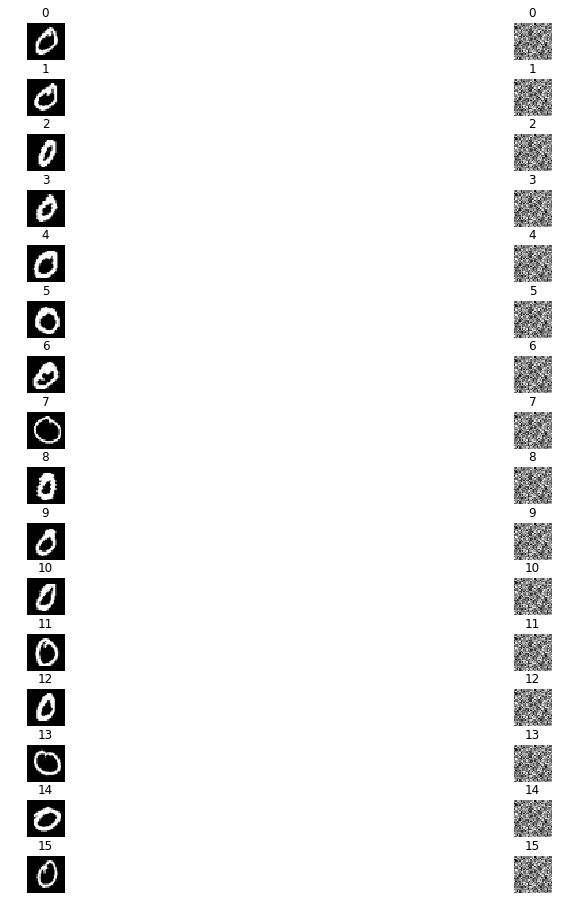

In [44]:
size=len(labels)
start_time = time.time()
lossvec,model=train_decoder_mse(EPOCH,data,model_in, optimizer,size)  
print('--- train mins %---')
print((time.time() - start_time)/60)
######################################

###############################################################################################################################
## UPDATE
print('Completed Exp5')
tensor, tensor_d, omega=x_xd_plot_compare(data,model,size)

## Output Results

In [ ]:
expnum='1'
tensor_d_name='output/'+exp_name+'exp'+expnum+'_tensor_d'
tensor_name='output/'+exp_name+'exp'+expnum+'_tensor'
omega_name='output/'+exp_name+'exp'+expnum+'_omega'
loss_filename='output/'+exp_name+'exp'+expnum+'_lossvec.csv'
labels_filename='output/'+exp_name+'exp'+expnum+'_labels_test.csv'

filenames=[tensor_name, tensor_d_name, omega_name]
data_out=[]
data_out.append(tensor)
data_out.append(tensor_d)
data_out.append(omega)

for i in range(0,len(filenames)):
    out_file=filenames[i]+'.csv'
    export_tensor(data_out[i],out_file)
np.savetxt(loss_filename, lossvec)
np.savetxt(labels_filename, labels)

# Experiment #2

## Run Model

In [ ]:
model_in =   AE_4L6D()
optimizer = torch.optim.Adam(model_in.parameters(), lr=LR)
train_loss = 0
optimizer.zero_grad()

In [ ]:
size=len(labels)
start_time = time.time()
lossvec, lossvec_cnt, model=train_decoder(EPOCH,data,model_in, optimizer,size) 
print('--- train mins %---')
print((time.time() - start_time)/60)
######################################

###############################################################################################################################
## UPDATE
print('Completed Exp5')
tensor, tensor_d, omega=x_xd_plot_compare(data,model,size)

## Output Results

In [ ]:
expnum='2'
tensor_d_name='output/'+exp_name+'exp'+expnum+'_tensor_d'
tensor_name='output/'+exp_name+'exp'+expnum+'_tensor'
omega_name='output/'+exp_name+'exp'+expnum+'_omega'
loss_filename='output/'+exp_name+'exp'+expnum+'_lossvec.csv'
labels_filename='output/'+exp_name+'exp'+expnum+'_labels_test.csv'

filenames=[tensor_name, tensor_d_name, omega_name]
data_out=[]
data_out.append(tensor)
data_out.append(tensor_d)
data_out.append(omega)

for i in range(0,len(filenames)):
    out_file=filenames[i]+'.csv'
    export_tensor(data_out[i],out_file)
np.savetxt(loss_filename, lossvec)
np.savetxt(labels_filename, labels)

# Experiment #3

# Experiment #4

# Experiment #5

# Experiment #6